##Задача.
Имеются обезличенные данные подростков 18 лет - вес и рос (фунт и дуюм).

Определим зависимость веса тела от роста, насколько сильна данная зависимость и насколько корректно мы можем описать данную зависимость линейным уравнением. 

Содержание:



*   корреляция и ковариация
*   коэффициент корреляции Пирсона
*   линейное уравнение как регрессионная модель зависимости 2х переменных
*   коэффициент детерминации
*   оценки качества модели
*   вывод








##Решение

Подгрузим необходимые библиотеки и файл с данными.

In [2]:
import numpy as np
import pandas as pd
import warnings
import io
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')


In [3]:
from google.colab import files
 
 
uploaded = files.upload()

Saving height_weight.csv to height_weight.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['height_weight.csv']), delimiter = ';')
print(df)

              H         W
0      65.78331  112.9925
1      71.51521  136.4873
2      69.39874  153.0269
3      68.21660  142.3354
4      67.78781  144.2971
...         ...       ...
24995  69.50215  118.0312
24996  64.54826  120.1932
24997  64.69855  118.2655
24998  67.52918  132.2682
24999  68.87761  124.8742

[25000 rows x 2 columns]


Построим график распределния 2х переменных для предварительного анализа зависимости.<br> Для этого переменной $x$ присвоим значения из столбца H (height), а переменной $y$ - из столбца W (weight).

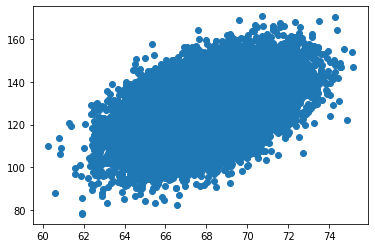

In [5]:
x = df['H']
y = df['W']
plt.scatter(x, y)

График в общем виде походит на линейный.

Для определения статистической взаимосвязи между случайными величинами существует понятие <b>КОРРЕЛЯЦИЯ</b> - матиматический показатель, который указывает на то, что изменения значений одной величины влияют на другую.<br> А коэффициент корреляции показывает, насколько велика эта взаимосвязь. Обозначается $r$ и может принимать значения от -1 до 1 включительно.<br>Когда коэффициент корреляции близок к 1, между величинами наблюдается прямая связь: увеличение одной величины сопровождается увеличением другой, и аналогично уменьшение одной величины сопровождается уменьшением другой.<br>Если же коэффициент корреляции близок к -1, между величинами есть обратная корреляционная связь: увеличение одной величины сопровождается уменьшением другой и наоборот.<br>Коэффициент корреляции, близкий к 0, говорит о том, что между величинами нет связи.<br>В зависимости от характера переменных можно выбрать подходящий метод вычисления коэффициента корреляции.<br>Для интервальных и количественных признаков используется <b>коэффициент корреляции Пирсона ($r$)</b>, относящийся к параметрическим показателям корреляции. Если хотя бы один из двух признаков — порядковый или его распределение не является нормальным, применяют ранговую корреляцию Спирмена или $\tau$ (тау) Кендалла — непараметрические показатели корреляции.<br> В нашем случае имеем нормальное распределение случайных величин (см графики ниже)



(array([   9.,  136., 1003., 3248., 6644., 7406., 4548., 1681.,  291.,
          34.]),
 array([60.27836 , 61.765804, 63.253248, 64.740692, 66.228136, 67.71558 ,
        69.203024, 70.690468, 72.177912, 73.665356, 75.1528  ]),
 <a list of 10 Patch objects>)

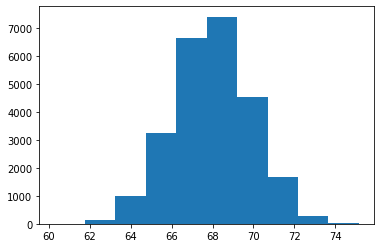

In [6]:
plt.hist(x)

(array([  13.,  112.,  759., 2949., 6397., 7677., 4986., 1714.,  360.,
          33.]),
 array([ 78.01476 ,  87.305684,  96.596608, 105.887532, 115.178456,
        124.46938 , 133.760304, 143.051228, 152.342152, 161.633076,
        170.924   ]),
 <a list of 10 Patch objects>)

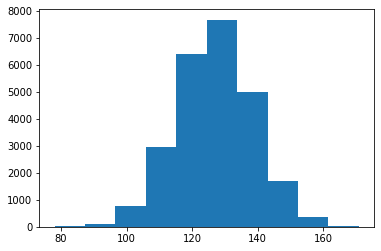

In [7]:
plt.hist(y)

<b>Ковариация</b>, или корреляционный момент — параметрический показатель, позволяющий судить о совместном распределении двух признаков. Равна математическому ожиданию произведения отклонений случайных величин:<br><br>$cov_{XY} = M[(X - M(X))(Y - M(Y))] = M(XY) - M(X)M(Y)=\overline{X \cdot Y} - \overline{X} \cdot \overline{Y}$<br><br>где $M$ — математическое ожидание, $\overline{X} \: и \:\overline{Y}$ — среднее значение выборок.

Размерность ковариации, которая равна произведению размерности случайных величин, имеет их масштаб,то есть величина ковариации зависит от единиц измерения независимых величин. В связи с этим ковариацию затруднительно применять для корреляционного анализа.

Зная ковариацию и среднее квадратичное отклонение каждого из двух признаков, можно вычислить коэффициент корреляции Пирсона:<br><br>$r_{XY} = \frac{cov_{XY}}{\sigma_{X}\sigma_{Y}}$

Определим коэффициент корреляции Пирсона для нашей зависимости.<br>Для начала посчитаем ковариацию:

In [8]:
MX = x.mean()
MY = y.mean()
cov = ((x - MX) * (y - MY)).sum() / (x.shape[0] - 1)
cov

11.15102917356732

проверка через библиотеку numpy:

In [9]:
np.cov(x, y)

array([[  3.61638215,  11.15102917],
       [ 11.15102917, 135.97653199]])

коэффициент корреляции Пирсона:

In [10]:
r_xy = cov / (x.std() * y.std())
r_xy

0.5028585206028441

проверка через библиотеку numpy:

In [11]:
np.corrcoef(x, y)

array([[1.        , 0.50285852],
       [0.50285852, 1.        ]])

Данный результат показывает, что связь между переменными $x$ и $y$ существует и зависимость прямая, т.е. увеличение одной переменной сопровождается увеличением другой. Но также данный результат показывает, что связь не сильная.

Рассмотрим связь наших переменных $x$ и $y$ через линейную функцию:<br><br>$y_i = a + bx_i + \varepsilon_i$, где:<br><br>$a$ и $b$ — коэффициенты регрессии;<br>$\varepsilon_i \; $—  так называемый остаток — независимая случайная величина, имеющая нормальное распределение с математическим 
ожиданием, равным нулю, и постоянной дисперсией.<br>То есть это ошибка, которую будет допускать модель из-за того, что изменение признака $x$
не всегда точно будет отражать изменение $y$.<br>В нашем случае данную величину учитывать не будем, т.о уравнение выглядит так:<br><br>$y = a + bx$

Найдем коэффициенты линейной регрессии $a$ & $b$:

In [12]:
n = x.shape[0]
n

25000

In [13]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = a = np.mean(y) - b * np.mean(x)

In [14]:
a

-82.57574306439962

In [15]:
b

3.0834764454008883

Функция зависимости примет вид:<br><br>$y = -82.58 + 3.08 \cdot x$

Определим значения $y$, которые будут предсказываться нашей моделью:

In [16]:
y_pred = a + b * x
y_pred

0        120.265544
1        137.939722
2        131.413637
3        127.768536
4        126.446372
            ...    
24995    131.732499
24996    116.457296
24997    116.920712
24998    125.648893
24999    129.806745
Name: H, Length: 25000, dtype: float64

Определим насколько велика связь между переменными $x$ и $y$ через коэффициент детерминации. Его считают как квадрат коэффициента корреляции:<br><br>$R^2 = r^{2}_{xy}$ <br><br> при этом $r_{xy}$  можно посчитать как:<br><br>$r_{xy} =  b \cdot {\frac{\sigma_x}{\sigma_y}}$<br><br>Т.о.

In [17]:
R2 = (b * np.std(x) / np.std(y))**2
R2

0.2528666917425402

Как видим - связь между перменными имеется, но слабая.

Визуализируем зависимость (точки - исходные данные, линия - модель)

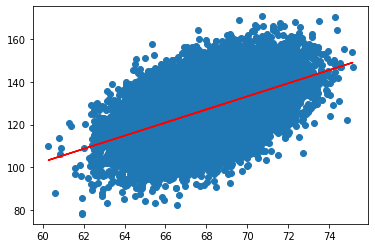

In [18]:
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.show()

Что бы определить качество работы полученной модели, найдем среднюю ошибку аппроксимации $\overline {A}$:<br><br>$\overline{A} = \frac{1}{n} \sum\limits_{i=1}^{n} \Bigl |{{\frac{y_i - \hat{y}_i}{y_i}} \Bigr |} \cdot{100\%}$<br><br>если $\overline{A}$ не превышает 8-10 %, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [19]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean


6.427490946001704

Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера.<br>Найдем фактическое значение $F$-критерия ($F_{факт}$) для парной линейной регрессии (когда есть только один факторный признак) по формуле:<br><br> $F_{факт} = \frac{r_{xy}^{2} \cdot (n - 2)}{(1 - r_{xy}^{2})}$

In [20]:
F_fact = (R2 * (n - 2)) / (1 - R2)
F_fact

8460.55381324502

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 25000 - 2 = 24998$ табличное значение критерия: $F_{кр} = 3.84$.

Так как $F_{факт} = 8460.55 > F_{кр} = 3.84$, уравнение регрессии признаем статистически значимым.

С помощью  **t-статистики Стьюдента** произведем оценку статистической значимости параметров регрессии.<br>*Значение* уровня значимости $\alpha$ выбирается статистиком произвольно, например, 0.05.<br>Число степеней свободы равно $df = n - m -1$, где $n$ — число наблюдений и $m$ — число признаков (факторов).<br>В нашем случае число степеней свободы будет равно $n - 2$.<br>Наблюдаемые значения критерия $t_a = \frac{a}{m_a}$ и $t_b = \frac{b}{m_b}$ сравниваются с табличными.<br>Если расчетное значение критерия $t_a$, $t_b$ больше табличного значения $t_{кр}$ при заданном  уровне значимости $\alpha$ (0,05), то коэффициент регрессии считается значимым.

Найдем случайные ошибки $m_a$ и $m_b$:<br><br>$m_a  = S_{ост} \cdot {\frac{\sqrt{\sum{x^2}}}{n \cdot {\sigma_x}}}$<br><br>$m_b = \frac{S_{ост}}{\sigma_x \cdot{\sqrt{n}}}$<br><br>Стандартная ошибка определяется по формуле:<br><br>$S_{ост} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - 2}}$

In [21]:
S = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))

m_a = S * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = S / (np.std(x) * np.sqrt(n))

print('S = {}\nm_a = {}\nm_b = {}'.format(S, m_a, m_b))


S = 10.079516864371328
m_a = 2.2802158393657654
m_b = 0.03352287357031325


При $df = n - 2 = 10 - 2 = 8$ и $\alpha = 0.05$ получим:<br><br>$t_{кр} = 1.9623391$

Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [22]:
t_a = a / m_a
t_a

-36.214002919727015

In [23]:
t_b = b / m_b
t_b

91.98126881734605

Так как фактические значения t-статистики больше табличного значения(по модулю), то параметры $a$ и $b$ считаем статистически значимыми.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$)

In [24]:
t = 1.9623391
delta_a = t * m_a
delta_a

4.474556698026761

In [25]:
delta_b = t * m_b
delta_b

0.06578324555138229

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [26]:
gamma_a_min = a - delta_a
gamma_a_min

-87.05029976242638

In [27]:
gamma_a_max = a + delta_a
gamma_a_max

-78.10118636637286

In [28]:
gamma_b_min = b - delta_b
gamma_b_min

3.017693199849506

In [29]:
gamma_b_max = b + delta_b
gamma_b_max

3.1492596909522708

# **Вывод**

Рассматриваемая зависимость веса (y) подростков 18 лет от роста (x), представленная в виде функции<br> $y = -82.58 + 3.08 \cdot x$<br>статистически значима и прямая, т.е. увеличение одной перменной сопровождается увеличением другой. При этом, коэффициенты $a$ и $b$, которые находятся в интервале [-87.0503; -78.1012] и [3.0177; 3.1493] соответственно, так же статистически значемы. Но при этом коэффициент детерминации $R^2$ указывает на то, что влияние(связь) роста на вес подростков слабо и существует другой параметр или множество параметров, которые в своей сумме имеют большее влияние(большую связь) на вес подростка, чем рост.